# Milestone 2
## Loading and Cleaning the Data
In the following cells, we load and clean the dataset using Pandas and Numpy
Tasks 1,2 and 3 are completed in the following.


In [1]:
# Importing modules and frameworks
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns
from datetime import datetime, date, timedelta
# Performing relative import of the self defined functions
from scripts import project_functions as pf

In [2]:
# Getting data
directory = "/home/yohen/Documents/Github/course-project-solo_331/data/raw/"
os.chdir(directory)
files = os.listdir()
print(files)

['StatewiseTestingDetails.csv', 'README.md', 'covid_19_india.csv']


In [3]:
# Loading data by method chaining as required for both datasets

# Statewise Dataset
statewise_tests = pf.load_and_process(directory+files[0], data_type="state")
# Printing the dataframe.head() for checking the df
print("Statewise Data: \n");print(statewise_tests.head());print("\n");print("*"*75)

# India-wide Dataset
covid_19_india = pf.load_and_process(directory+files[2], data_type="india")

# Printing the dataframe.head() for checking the df
print("India-Wide Data: \n")
print(covid_19_india)

Statewise Data: 

        Date                        State  Cumulative_Tests  Positive
0 2020-04-17  Andaman and Nicobar Islands            1403.0      12.0
1 2020-04-24  Andaman and Nicobar Islands            2679.0      27.0
2 2020-04-27  Andaman and Nicobar Islands            2848.0      33.0
3 2020-05-01  Andaman and Nicobar Islands            3754.0      33.0
4 2020-05-16  Andaman and Nicobar Islands            6677.0      33.0


***************************************************************************
India-Wide Data: 

           Date State/UnionTerritory   Cured  Deaths  Positives
0    2020-01-30               Kerala       0       0          1
1    2020-01-31               Kerala       0       0          1
2    2020-02-01               Kerala       0       0          2
3    2020-02-02               Kerala       0       0          3
4    2020-02-03               Kerala       0       0          3
...         ...                  ...     ...     ...        ...
7081 2020-10-07  

In [4]:
# We can now see that the 2 datasets are somehow redundant. 
df = covid_19_india.drop([0])
print(df.head())

        Date State/UnionTerritory  Cured  Deaths  Positives
1 2020-01-31               Kerala      0       0          1
2 2020-02-01               Kerala      0       0          2
3 2020-02-02               Kerala      0       0          3
4 2020-02-03               Kerala      0       0          3
5 2020-02-04               Kerala      0       0          3


##  Exploratory Data Analysis (EDA)
The following cells are used to conduct an EDA on the dataset.
Step 4 is completed.

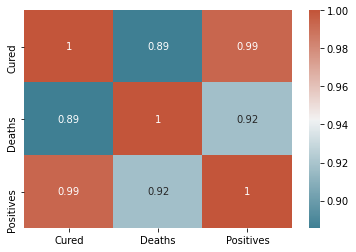

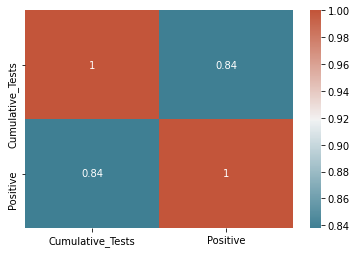

In [5]:
# Using plot_correlation_matrix from pf to generate heatmaps of correlation matrix.
pf.plot_correlation_matrix(df=covid_19_india)
plt.show()
pf.plot_correlation_matrix(df=statewise_tests)
plt.show()

In the above heatmaps of the correlation matrices, we see a few things:
1. There is a high positive corelation to the number of tests and positive results.
    - This might mean that there are more people not tested who might be infected.
2. There is also a positive correlation between the number of positive results and deaths.
    - This indicates the life threathning behaviour of the virus.

-----------------------------------------------------------------
Now, let us analyze the data using a scatterplot to see the correlations even deeper.
First, we look at the scatter plots between all the variables.

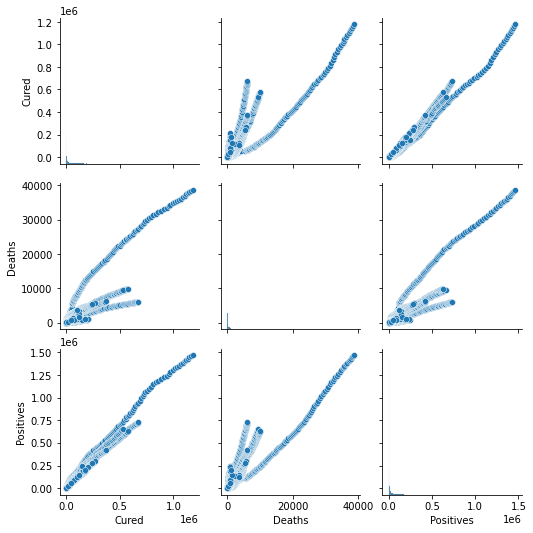

In [6]:
sns.pairplot(covid_19_india)
plt.show()

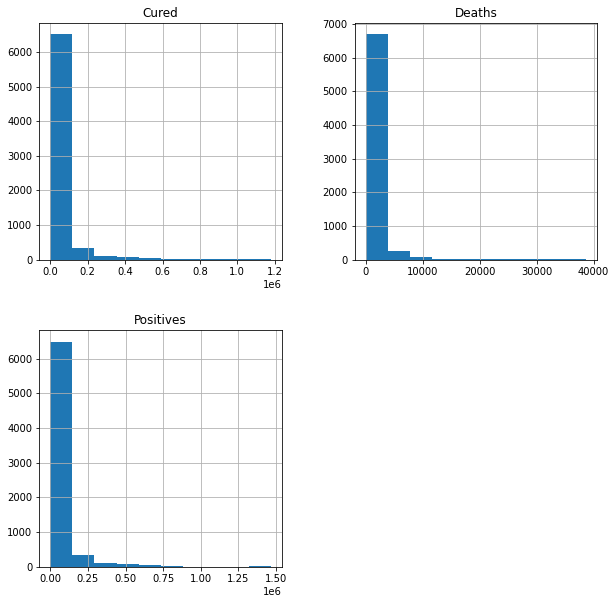

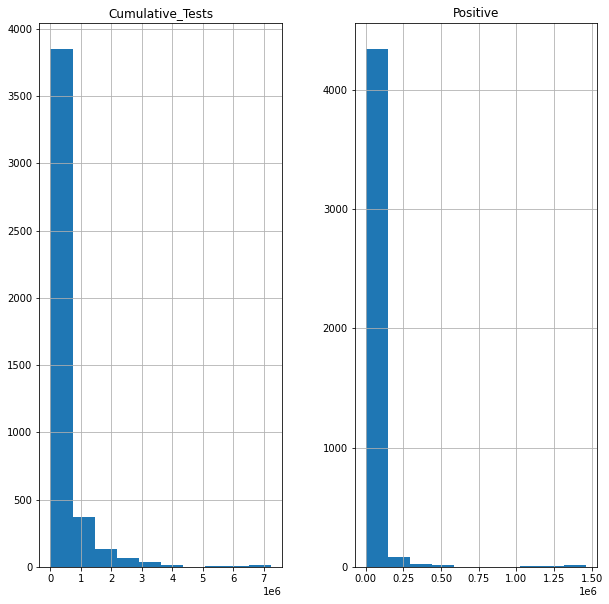

In [37]:
hist = covid_19_india.hist(bins=10,figsize =(10,10))
hist = statewise_tests.hist(bins=10,figsize =(10,10))

To get a closer look, let us create some individual scatter plots.

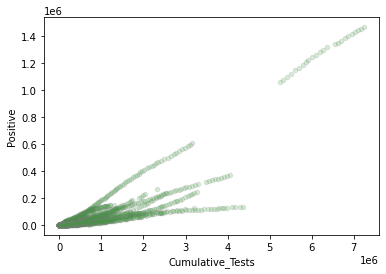

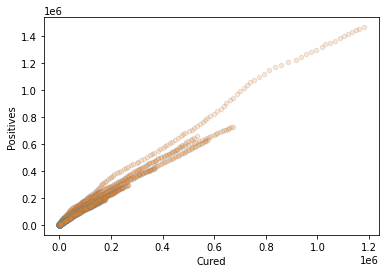

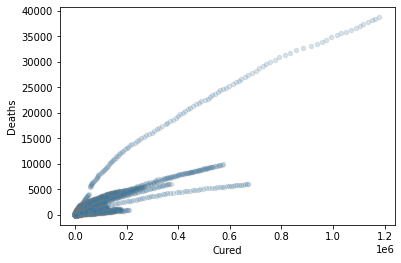

In [7]:
statewise_tests.plot(kind='scatter', x='Cumulative_Tests', y='Positive', color="tab:green", alpha=0.2, edgecolor="Grey")
plt.show()
covid_19_india.plot(kind='scatter', x='Cured', y='Positives', color="tab:orange", alpha=0.2, edgecolor="Grey")
plt.show()
covid_19_india.plot(kind='scatter', x='Cured', y='Deaths', color="tab:blue", alpha=0.2, edgecolor="Grey")
plt.show()

From the above scatter plots, it is clear that the number of people dying are more than the number of people cured. Moreover, the number of victims cured stops being significant after a certain amount of people testing positive. This may mean an overload on the hospitals; not allowing them to cater to everyone illness.

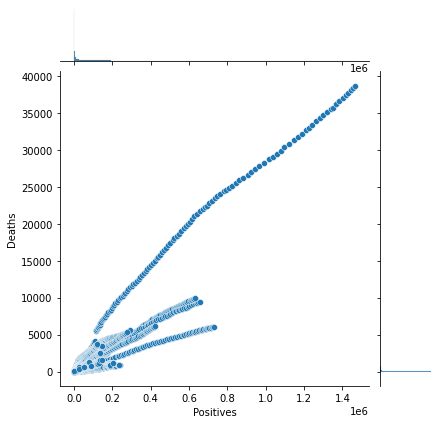

In [22]:
sns.jointplot(data=covid_19_india, x="Positives", y="Deaths")

## Detailed Analysis

### Research Question
Are the 21 days of lockdowns effective? Meaning:
1. Did the number of postitive results reduce?
2. Did the number of cured patients change as medical facilities would ideally be not as overwhelmed.

To be able to determine this, we must first find out when these lockdowns were imposed. Extracted form [Wikipedia](https://en.wikipedia.org/wiki/COVID-19_pandemic_lockdown_in_India#Lockdown), the following are the dates:
1. Phase 1 (25 March - 14 April)
2. Phase 2 (15 April - 03 May)
3. Phase 3 (04 May   - 17 May) Extension
4. Phase 4 (18 May   - 31 May) Extension

These four phases were continous so we will consider is as one. Meaning from 25 March to 31 May. Then, we will see if it reduced. 

Here, it is important to analyze the days before (we will consider 15 days into the loackdown as people infected before would test positive then) and after the lockdown. So the dates are as follows:
1. 10 March - 14 April, 
2. 1 June - 30 June

The reason I am only focusing on the initial stages of the pandemic is becasue this is the time things went out of hand in the country. As you can see below, the rise of cases throughout the country started in April.

![India Covid-19 Timeline: NYT](../images/Covid-19_India_Trend.png)

For the purpose of my research, I will focus on the worst state and the best states, in terms of number of cases.

Worst: Maharashtra, Delhi

Best : Mizoram, Manipur

<AxesSubplot:xlabel='Deaths', ylabel='Date'>

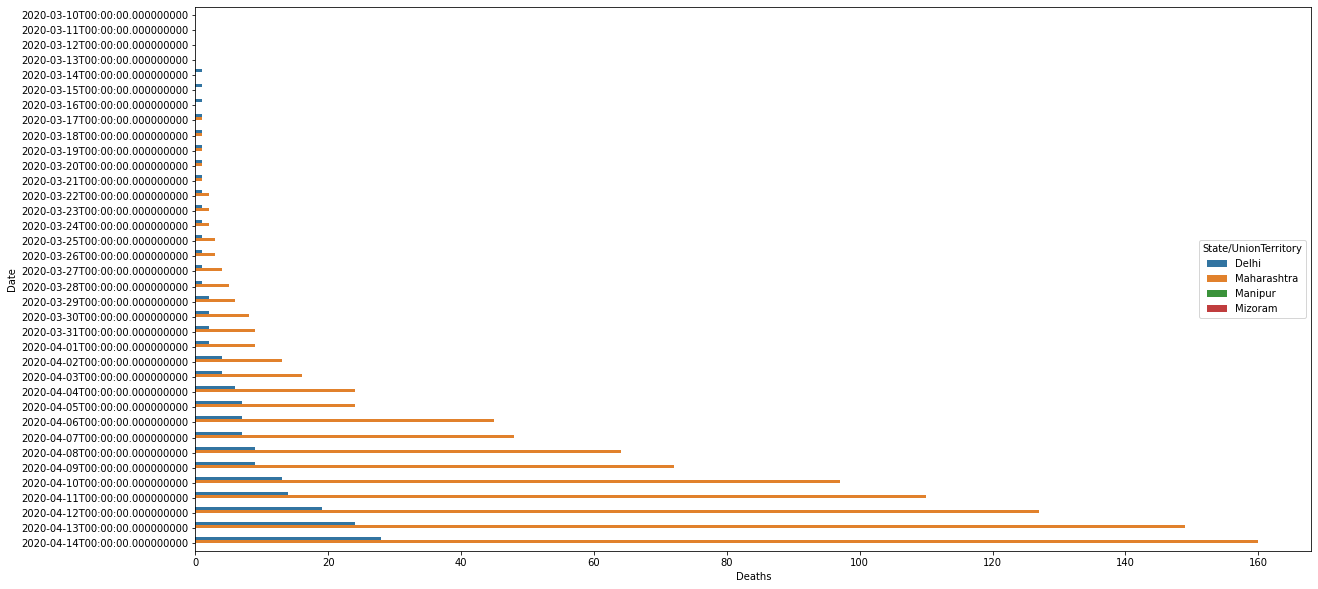

In [67]:
# Before the Lockdown
start = pd.to_datetime("10/03/2020", dayfirst=True)
end = pd.to_datetime("14/04/2020", dayfirst=True)
ax = plt.figure(figsize=(20,10))
data_before = covid_19_india[(covid_19_india["Date"]>=start) 
                                  & (covid_19_india["Date"]<=end) 
                                  & ((covid_19_india["State/UnionTerritory"]=="Maharashtra")
                                     |(covid_19_india["State/UnionTerritory"]=="Delhi") 
                                     |(covid_19_india["State/UnionTerritory"]=="Mizoram")
                                     |(covid_19_india["State/UnionTerritory"]=="Manipur"))]
sns.barplot(data=data_before, y="Date", x="Deaths", hue="State/UnionTerritory")
# sns.scatterplot(x="Positives", 
#                 y="Date",
#                 sizes=(100,500),
#                 alpha=0.5,
#                 hue="State/UnionTerritory",
# #                 data=data_before)
# sns.lmplot(x="Positives", 
#             y="Deaths",
#             hue="State/UnionTerritory",
#             data=data_before,
#             height=10)

<AxesSubplot:xlabel='Deaths', ylabel='Date'>

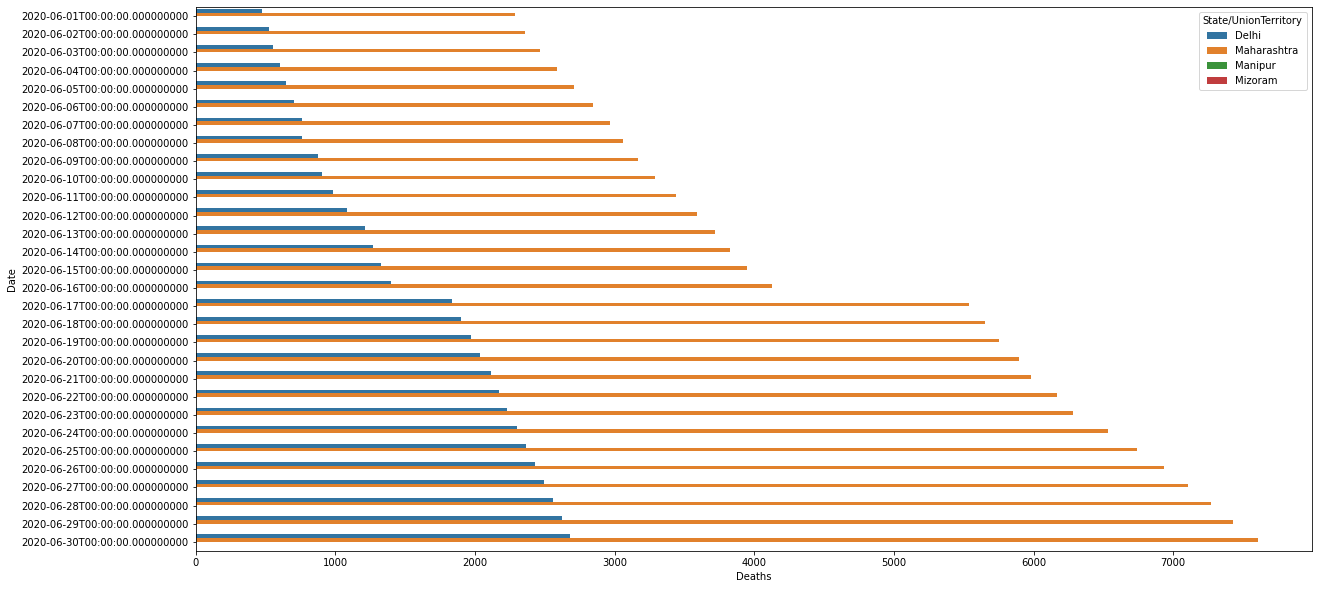

In [68]:
# Before the Lockdown
start = pd.to_datetime("01/06/2020", dayfirst=True)
end = pd.to_datetime("30/06/2020", dayfirst=True)
ax = plt.figure(figsize=(20,10))
data_before = covid_19_india[(covid_19_india["Date"]>=start) 
                                  & (covid_19_india["Date"]<=end) 
                                  & ((covid_19_india["State/UnionTerritory"]=="Maharashtra")
                                     |(covid_19_india["State/UnionTerritory"]=="Delhi") 
                                     |(covid_19_india["State/UnionTerritory"]=="Mizoram")
                                     |(covid_19_india["State/UnionTerritory"]=="Manipur"))]
sns.barplot(data=data_before, y="Date", x="Deaths", hue="State/UnionTerritory")
# sns.scatterplot(x="Positives", 
#                 y="Date",
#                 sizes=(100,500),
#                 alpha=0.5,
#                 hue="State/UnionTerritory",
# #                 data=data_before)
# sns.lmplot(x="Positives", 
#             y="Deaths",
#             hue="State/UnionTerritory",
#             data=data_before,
#             height=10)

### Summary

- **Research Question :** Was the country wide lockdown effective?

    - It is clear that the situation got worse after the lockdown. Hence it was not. 
    - Later on, the Government started Lockdowns for certain states and areas. In milestone 3, I will analyze if those were more effective in flattening the curve.

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


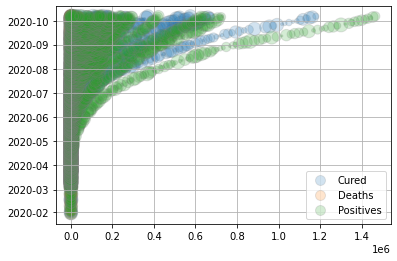

In [72]:
start = date.fromisoformat('2020-03-05')
fig, ax = plt.subplots()
y_data = covid_19_india["Date"]
colors = ['tab:blue', 'tab:orange', 'tab:green']
i=0
for columnName, columnData in covid_19_india.iteritems():
    if columnName=="Date":
        print(type(columnData[3]))
    if columnName=="Date" or columnName=="State/UnionTerritory" or columnName=="Time":
        continue
    scale = 200.0 * np.random.rand(len(columnData))
    ax.scatter(x=columnData, y=y_data, c=colors[i], s=scale, label=columnName,
               alpha=0.2, edgecolors="Grey")
    i+=1
ax.legend()
ax.grid(True)

plt.show()